3. Processamento e análise dos dados:

a) Liste os campos que compõem cada registro:

In [1]:
import pandas as pd

# Carregue o dataset
df = pd.read_csv('./Database/Mixed.csv')

# Liste os campos que compõem cada registro
print(df.columns)


Index(['title', 'text', 'subject', 'date'], dtype='object')


b) Liste os labels das classes existentes:

In [4]:
import pandas as pd

# Carregue o dataset
df = pd.read_csv('./Database/Mixed.csv')

# Liste os labels únicos na coluna 'subject'
unique_subjects = df['subject'].unique()

# Exiba os subjects encontrados
print("Labels das classes existentes (subjects):")
print(unique_subjects)

Labels das classes existentes (subjects):
['politics' 'left-news' 'News' 'politicsNews' 'worldnews' 'US_News'
 'Government News' 'Middle-east']


c) Liste a quantidade de registros que não contenham label, que contenham um label, dois labels, até o máximo de labels existentes:

In [5]:
df['label_count'] = df['subject'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

label_distribution = df['label_count'].value_counts().sort_index()

print("Quantidade de registros por número de labels:")
print(label_distribution)

no_label_count = (df['label_count'] == 0).sum()
print(f'Quantidade de registros sem label: {no_label_count}')


Quantidade de registros por número de labels:
label_count
1    21417
Name: count, dtype: int64
Quantidade de registros sem label: 0


d) Liste a quantidade de registros associados a cada label/classe existente:

In [6]:
# Contar a quantidade de registros por classe na coluna 'subject'
label_counts = df['subject'].value_counts()

# Exiba a contagem de registros por label
print("Quantidade de registros associados a cada label/classe existente:")
print(label_counts)


Quantidade de registros associados a cada label/classe existente:
subject
News               6332
politics           4774
left-news          3141
politicsNews       2600
worldnews          2381
Government News    1112
US_News             543
Middle-east         534
Name: count, dtype: int64


e) Liste a quantidade de registros com labels/classes e sem labels/classes:

In [7]:
# Registros com labels
with_labels = df[df['subject'].notnull()].shape[0]

# Registros sem labels
without_labels = df[df['subject'].isnull()].shape[0]

print(f'Quantidade de registros com labels: {with_labels}')
print(f'Quantidade de registros sem labels: {without_labels}')


Quantidade de registros com labels: 21417
Quantidade de registros sem labels: 0


4. Identifique quais labels/classes serão utilizados na atividade de classificação e aplique um filtro apropriado para uso destes registros:

In [8]:
# Filtre os registros que você vai usar para classificação (exemplo: apenas registros com 'politics')
filtered_df = df[df['subject'] == 'politics']

# Exiba a quantidade de registros filtrados
print(f'Quantidade de registros filtrados para classificação: {filtered_df.shape[0]}')


Quantidade de registros filtrados para classificação: 4774


5. Crie uma nova coluna no dataframe do Pandas que você está utilizando para indicar se o registro possui label ou não:

In [9]:
# Adiciona a coluna 'has_label'
df['has_label'] = df['subject'].apply(lambda x: 1 if pd.notnull(x) else 0)

# Exiba as primeiras linhas do dataframe para verificar a nova coluna
print(df[['subject', 'has_label']].head())


        subject  has_label
0      politics          1
1     left-news          1
2          News          1
3  politicsNews          1
4     left-news          1


6. Caso dois ou mais campos contenham informação textual de interesse para a análise, avalie a possibilidade de concatená-los em um único campo:

In [10]:
# Concatenar 'title' e 'text' em um novo campo
df['combined_text'] = df['title'] + " " + df['text']

# Exiba as primeiras linhas para verificar a nova coluna
print(df[['title', 'text', 'combined_text']].head())


                                               title  \
0  NO TOILET PAPER?! SOCIALISM IS IN ITS FINAL ST...   
1  LIBERAL Lansing, MI Mayor Forced To REMOVE “Sa...   
2   BOMBSHELL Report Just Dropped Showing Gorsuch...   
3  U.S. spy agencies probe another flank in Russi...   
4  (VIDEO) WOMAN BEATEN BY TWO TEENS AFTER ‘SHUSH...   

                                                text  \
0  Socialism doesn t work but I guess Venezuela d...   
1  Watch his appearance on Tucker Carlson where h...   
2  Apparently, original ideas are a liability in ...   
3  SAN FRANCISCO (Reuters) - Russian hacking of t...   
4  Is everyone else thinking what I m thinking? T...   

                                       combined_text  
0  NO TOILET PAPER?! SOCIALISM IS IN ITS FINAL ST...  
1  LIBERAL Lansing, MI Mayor Forced To REMOVE “Sa...  
2   BOMBSHELL Report Just Dropped Showing Gorsuch...  
3  U.S. spy agencies probe another flank in Russi...  
4  (VIDEO) WOMAN BEATEN BY TWO TEENS AFTER ‘SHUSH..

7. Identifique possíveis registros duplicados e remova-os:

In [11]:

duplicates = df.duplicated().sum()
print(f'Número de registros duplicados encontrados: {duplicates}')

df.drop_duplicates(inplace=True)
print(f'Número total de registros após remoção de duplicados: {df.shape[0]}')


Número de registros duplicados encontrados: 13
Número total de registros após remoção de duplicados: 21404


8. Apresente um gráfico para mostrar a distribuição de quantidade de palavras por registro:

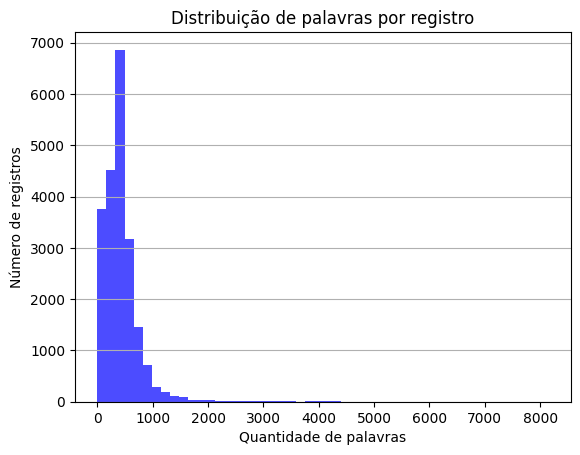

In [12]:
import matplotlib.pyplot as plt

# Contar o número de palavras por registro (na coluna 'combined_text')
df['word_count'] = df['combined_text'].apply(lambda x: len(str(x).split()))

# Plotar a distribuição
plt.hist(df['word_count'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Quantidade de palavras')
plt.ylabel('Número de registros')
plt.title('Distribuição de palavras por registro')
plt.grid(axis='y')
plt.show()

9. Utilize a biblioteca Scikit-multilearn para criar os conjuntos de registros para treinamento, validação e teste:

In [16]:
import pandas as pd
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

# Supondo que 'subject' contém múltiplas classes separadas por vírgula
df['subject'] = df['subject'].fillna('')  # Certifique-se de que não haja NaNs
df['subject'] = df['subject'].apply(lambda x: x.split(','))  # Divida as classes em listas

# Prepare os dados
X = df['combined_text'].values.reshape(-1, 1)  # Reshape para ser uma matriz 2D
y = MultiLabelBinarizer().fit_transform(df['subject'])

# Divisão do dataset (80% treino, 10% validação, 10% teste)
X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size=0.2)

# Verifique os tamanhos dos conjuntos
print(f'Tamanho do conjunto de treino: {X_train.shape[0]}')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]}')

Tamanho do conjunto de treino: 17124
Tamanho do conjunto de teste: 4280


10. Crie os training slices do seu dataset:

In [19]:
import numpy as np

# Defina os tamanhos dos slices (pode ser ajustado conforme necessário)
train_size = 0.8
validation_size = 0.1
test_size = 0.1

# Confirme que os tamanhos estão corretos
assert np.isclose(train_size + validation_size + test_size, 1.0), "Os tamanhos devem somar 1."

# Gerar os índices dos slices para treinamento, validação e teste
num_train = int(len(X_train) * train_size)
num_val = int(len(X_train) * validation_size)

# Criar slices
X_train_slice = X_train[:num_train]
y_train_slice = y_train[:num_train]

X_val_slice = X_train[num_train:num_train + num_val]
y_val_slice = y_train[num_train:num_train + num_val]

# Usar o restante como teste (se necessário, já está definido em X_test e y_test)
# Aqui você pode usar X_test e y_test conforme eles já foram separados no item anterior

# Exibir tamanhos dos slices
print(f"Tamanho do training slice: {X_train_slice.shape[0]}")
print(f"Tamanho do validation slice: {X_val_slice.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")


Tamanho do training slice: 12328
Tamanho do validation slice: 1541
Tamanho do conjunto de teste: 4280


11. Implemente o Naive Bayesline e apresente os gráficos para Micro e Macro F1 score:

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.multiclass import OneVsRestClassifier

# 1. Criar um pipeline com CountVectorizer e OneVsRestClassifier com MultinomialNB
model = make_pipeline(CountVectorizer(), OneVsRestClassifier(MultinomialNB()))

# 2. Treinar o modelo com o conjunto de treinamento
model.fit(X_train_slice.ravel(), y_train_slice)

# 3. Fazer previsões no conjunto de validação
y_val_pred = model.predict(X_val_slice.ravel())

# 4. Calcular Micro e Macro F1 Score
micro_f1 = f1_score(y_val_slice, y_val_pred, average='micro')
macro_f1 = f1_score(y_val_slice, y_val_pred, average='macro')

# 5. Exibir os resultados
print(f'Micro F1 Score: {micro_f1:.4f}')
print(f'Macro F1 Score: {macro_f1:.4f}')


Micro F1 Score: 0.6491
Macro F1 Score: 0.5305


12. Uso do GPT-2 para Embeddings e Avaliação com FAISS

In [28]:
import torch
from transformers import GPT2Tokenizer, GPT2Model
import numpy as np
import faiss
import os

# tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
# model = GPT2Model.from_pretrained("gpt2")

# tokenizer.pad_token = tokenizer.eos_token

# model.eval()

# def get_embeddings(texts, batch_size=16):
#     embeddings = []
#     for i in range(0, len(texts), batch_size):
#         batch = texts[i:i + batch_size]
#         inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt", max_length=512)
#         with torch.no_grad():
#             outputs = model(**inputs)
#         embeddings.append(outputs.last_hidden_state.mean(dim=1).numpy())
    
#     return np.concatenate(embeddings)

# if os.path.exists('X_train_embeddings.npy') and os.path.exists('X_val_embeddings.npy'):
#     X_train_embeddings = np.load('X_train_embeddings.npy')
#     X_val_embeddings = np.load('X_val_embeddings.npy')
# else:
#     X_train_slice_list = X_train_slice.ravel().tolist() 
#     X_val_slice_list = X_val_slice.ravel().tolist()     

#     X_train_embeddings = get_embeddings(X_train_slice_list)
#     X_val_embeddings = get_embeddings(X_val_slice_list)

#     np.save('X_train_embeddings.npy', X_train_embeddings)
#     np.save('X_val_embeddings.npy', X_val_embeddings)

# print(f"Shape dos embeddings de treino: {X_train_embeddings.shape}")
# print(f"Shape dos embeddings de validação: {X_val_embeddings.shape}")


Shape dos embeddings de treino: (12328, 768)
Shape dos embeddings de validação: (1541, 768)


In [3]:
import faiss
import numpy as np

# Carregar os embeddings previamente salvos
X_train_embeddings = np.load('X_train_embeddings.npy')
X_val_embeddings = np.load('X_val_embeddings.npy')

# Verificar a forma dos embeddings de treinamento
print(f"Dimensão de X_train_embeddings: {X_train_embeddings.shape}")
print(f"Tipo de dados de X_train_embeddings: {X_train_embeddings.dtype}")

# Verificar a forma dos embeddings de validação
print(f"Dimensão de X_val_embeddings: {X_val_embeddings.shape}")
print(f"Tipo de dados de X_val_embeddings: {X_val_embeddings.dtype}")

# Garantir que os embeddings estão no formato correto (contíguos e float32)
X_train_embeddings = np.ascontiguousarray(X_train_embeddings, dtype='float32')
X_val_embeddings = np.ascontiguousarray(X_val_embeddings, dtype='float32')

# Criar o índice FAISS com a distância L2 (euclidiana)
dim = X_train_embeddings.shape[1]  # Dimensão dos embeddings
index = faiss.IndexFlatL2(dim)

# Adicionar os embeddings de treinamento ao índice
index.add(X_train_embeddings)

# Verificar se o índice foi criado com sucesso
print(f"Índice FAISS criado com {index.ntotal} entradas.")

# Realizar a busca nos embeddings de validação
k = 5  # Número de vizinhos mais próximos
distances, indices = index.search(X_val_embeddings, k)

# Exibir os resultados da busca
print("Distâncias:", distances)
print("Índices dos vizinhos mais próximos:", indices)


Dimensão de X_train_embeddings: (12328, 768)
Tipo de dados de X_train_embeddings: float32
Dimensão de X_val_embeddings: (1541, 768)
Tipo de dados de X_val_embeddings: float32
Índice FAISS criado com 12328 entradas.
Distâncias: [[3.1250000e-02 4.3437500e+00 4.6406250e+00 6.8125000e+00 7.4218750e+00]
 [0.0000000e+00 3.5476562e+01 3.5476562e+01 7.0960938e+01 7.5632812e+01]
 [9.0859375e+00 2.6070312e+01 3.3867188e+01 3.3867188e+01 5.8945312e+01]
 ...
 [1.8179688e+01 2.0531250e+01 2.2203125e+01 2.3890625e+01 2.4210938e+01]
 [2.4554688e+01 2.8070312e+01 2.8171875e+01 2.9117188e+01 2.9429688e+01]
 [2.9507812e+01 3.8929688e+01 3.9875000e+01 4.0359375e+01 4.1242188e+01]]
Índices dos vizinhos mais próximos: [[11008  7807  4781  2562  2995]
 [ 1712  9389 11949  2045  1364]
 [ 2328  6022  4771  9280  1464]
 ...
 [ 6505  4127  4492  2845  7982]
 [ 6998 12105  3493  1512  6689]
 [ 2454  6193   615  8228  4969]]
